# Predictive Analytics: Prediksi Kanker

---



Oleh

Nama: Rebecca Olivia Javenka Br. Manurung

URL Profil: https://www.dicoding.com/users/rebeccaolivia/academies

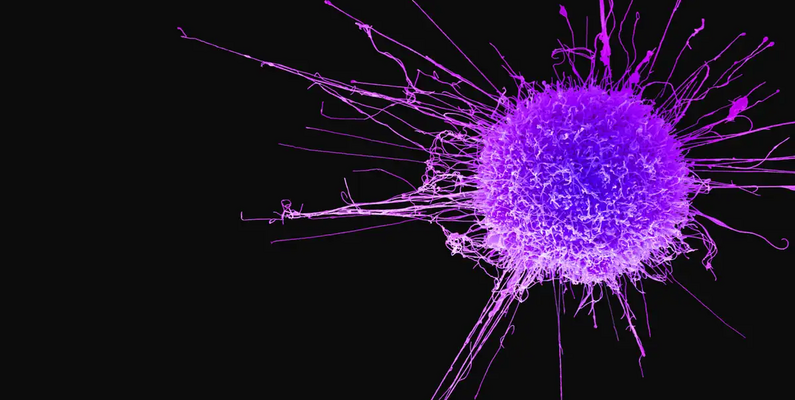)



## Deskripsi Proyek

Proyek ini bertujuan untuk membangun model machine learning yang dapat memprediksi kemungkinan seseorang mengidap kanker secara lebih cepat dan akurat. Saat ini, proses diagnosis kanker sering membutuhkan waktu dan biaya yang tidak sedikit, serta bergantung pada pemeriksaan manual yang berisiko menimbulkan keterlambatan. Dengan pendekatan prediktif berbasis data, proyek ini diharapkan dapat membantu proses deteksi dini dan mendukung pengambilan keputusan di bidang kesehatan secara lebih efisien.



# 1. Import Library yang Dibutuhkan

Pada tahap ini, kita mengimpor berbagai pustaka Python yang diperlukan untuk seluruh proses analisis data dan pembangunan model machine learning. Setiap pustaka memiliki fungsi spesifik.


---



In [152]:
# Instalasi library Kaggle (opsional, hanya jika Anda akan menggunakan Kaggle API)
!pip install -q kaggle

Digunakan jika dataset diambil langsung dari Kaggle menggunakan API. Ini opsional, tergantung sumber data.

In [153]:
# 1. Import modul yang dibutuhkan untuk manipulasi dan visualisasi data
import pandas as pd  # Untuk manipulasi data menggunakan DataFrame
import matplotlib.pyplot as plt  # Untuk visualisasi data dengan plot
import seaborn as sns  # Untuk visualisasi data yang lebih menarik
### pandas membantu membaca dan memproses data tabular, sementara matplotlib dan seaborn digunakan untuk eksplorasi visual.

# 2. Import modul yang dibutuhkan untuk pre-processing data
from sklearn.preprocessing import StandardScaler  # Untuk standarisasi fitur numerik
from sklearn.model_selection import train_test_split  # Untuk membagi data menjadi training dan testing set
### Pre-processing sangat penting untuk memastikan bahwa data dalam skala yang seragam sebelum digunakan oleh model.

# 3. Import modul yang dibutuhkan untuk membangun model machine learning
from sklearn.linear_model import LogisticRegression  # Model Regresi Logistik
from sklearn.neighbors import KNeighborsClassifier  # Model K-Nearest Neighbors
from sklearn.tree import DecisionTreeClassifier  # Model Decision Tree
from sklearn.ensemble import RandomForestClassifier  # Model Random Forest
### Ini adalah berbagai algoritma machine learning yang umum digunakan dalam masalah klasifikasi seperti prediksi kanker.

# 4. Import modul yang dibutuhkan untuk evaluasi model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Metrik evaluasi model
### Evaluasi penting untuk mengetahui seberapa baik model bekerja terhadap data baru.

# 5. Abaikan peringatan yang mungkin muncul
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
### Digunakan agar output tidak dipenuhi oleh peringatan yang tidak relevan.

# 2. Data Understanding

Pada tahap ini, kita mulai memahami struktur dan isi data.


---



## 2.1 Gathering Data



Mengumpulkan data ke dalam notebook agar dapat diproses.

---



In [154]:
# Mengunggah file dari penyimpanan lokal ke Google Colab.
from google.colab import files
uploaded = files.upload()

Saving The_Cancer_data_1500_V2.csv.zip to The_Cancer_data_1500_V2.csv.zip


 Menunjukkan bahwa file ZIP berhasil diunggah. File ini berisi dataset yang akan digunakan.



In [155]:
# Ekstrak file dataset (jika diunggah dalam format ZIP).
import zipfile
with zipfile.ZipFile('The_Cancer_data_1500_V2.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [156]:
# Membaca data dari file CSV ke dalam DataFrame pandas.
df = pd.read_csv('The_Cancer_data_1500_V2.csv')
df.head()  # Menampilkan 5 baris pertama data.

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


Menunjukkan gambaran awal data. Setiap baris mewakili data satu pasien, dan kolom-kolom merepresentasikan fitur yang digunakan dalam prediksi kanker.



## 2.2 Data Assesing and Data Cleaning


Bertujuan untuk melakukan penilaian awal terhadap kualitas data yang tersedia serta membersihkan data dari potensi permasalahan yang dapat mengganggu analisis lebih lanjut. Proses ini mencakup pengecekan tipe data, jumlah entri kosong (missing values), data duplikat, serta menampilkan statistik deskriptif guna memahami karakteristik masing-masing fitur. Dengan melakukan tahap ini, kita dapat memastikan bahwa data yang digunakan berada dalam kondisi yang layak dan siap untuk dianalisis secara lebih mendalam.

---



In [157]:
df

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
...,...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1


Perintah ini digunakan untuk menampilkan isi dari DataFrame secara keseluruhan. Berdasarkan output yang ditampilkan, dataset ini memiliki 1500 baris dan 9 kolom dengan nama:

1.   Age merupakan data numerik bertipe integer yang menunjukkan usia pasien. Nilai pada kolom ini berada dalam rentang antara 20 hingga 80 tahun.

2.   Gender merupakan data kategorik biner yang merepresentasikan jenis kelamin pasien. Nilai 0 menunjukkan laki-laki, sedangkan nilai 1 menunjukkan perempuan.

3.   BMI (Body Mass Index) merupakan data kontinu bertipe float yang menyatakan indeks massa tubuh pasien. Nilai BMI pada dataset berkisar antara 15 hingga 40, yang dapat menggambarkan status berat badan seseorang relatif terhadap tinggi badannya.

4. Smoking merupakan data kategorik biner yang menunjukkan status merokok pasien. Nilai 0 berarti tidak merokok, dan nilai 1 berarti merokok.

5. GeneticRisk merupakan data kategorik yang menggambarkan tingkat risiko genetik pasien terhadap kanker. Nilai 0 menunjukkan risiko rendah, 1 risiko sedang, dan 2 risiko tinggi.

6. PhysicalActivity merupakan data kontinu bertipe float yang menunjukkan jumlah jam aktivitas fisik pasien per minggu. Nilai berada dalam rentang 0 hingga 10 jam/minggu.

7. AlcoholIntake merupakan data kontinu bertipe float yang menunjukkan jumlah konsumsi alkohol dalam satuan tertentu per minggu. Nilai berkisar antara 0 hingga 5 satuan/minggu.

8. CancerHistory merupakan data kategorik biner yang menunjukkan riwayat pribadi pasien terkait kanker. Nilai 0 berarti tidak memiliki riwayat kanker, sedangkan nilai 1 berarti memiliki riwayat kanker.

9. Diagnosis merupakan data kategorik biner sebagai label (target) yang menunjukkan status diagnosis kanker pada pasien. Nilai 0 berarti tidak terdiagnosis kanker, dan 1 berarti terdiagnosis kanker.



In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


Metode df.info() digunakan untuk melihat ringkasan struktur DataFrame, termasuk tipe data, jumlah entri non-null pada setiap kolom, serta penggunaan memori. Berdasarkan hasil yang ditampilkan:


*   Dataset ini terdiri atas 1500 baris dan 9 kolom.
*   Seluruh kolom memiliki 1500 non-null values, yang berarti tidak terdapat data kosong atau hilang.
*   Tipe data terdiri dari:
    - int64 (6 kolom): untuk data diskrit seperti usia dan status biner.
    - float64 (3 kolom): untuk data kontinu seperti BMI, aktivitas fisik, dan konsumsi alkohol.

In [159]:
# Menghitung jumlah nilai yang hilang (NaN) di setiap kolom DataFrame.
df.isna().sum()

,0
Age,0
Gender,0
BMI,0
Smoking,0
GeneticRisk,0
PhysicalActivity,0
AlcoholIntake,0
CancerHistory,0
Diagnosis,0


Perintah ini digunakan untuk menghitung jumlah data yang hilang (missing values) pada masing-masing kolom. Berdasarkan hasil yang ditampilkan, seluruh kolom memiliki nol nilai yang hilang, sehingga tidak diperlukan proses imputasi atau penghapusan nilai NaN.

In [160]:
# Menghitung jumlah baris duplikat dalam DataFrame.
df.duplicated().sum()

np.int64(0)

Fungsi duplicated() digunakan untuk mendeteksi adanya baris yang sama persis (duplikat) di dalam DataFrame, kemudian fungsi sum() menghitung totalnya. Hasil output menunjukkan tidak terdapat baris duplikat dalam dataset, sehingga tidak diperlukan pembersihan data dalam konteks ini.



In [161]:
# Menampilkan statistik deskriptif untuk kolom numerik dalam DataFrame.
df.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


Fungsi df.describe() digunakan untuk menampilkan statistik deskriptif dari kolom-kolom numerik, antara lain:


*   Count: jumlah entri non-null per kolom (dalam hal ini, semuanya 1500).
*   Mean: nilai rata-rata.
*   Std: standar deviasi.
*   Min: nilai minimum.
*   25%: kuartil pertama (Q1).
*   50%: nilai median atau kuartil kedua (Q2).
*   75%: kuartil ketiga (Q3).
*   Max: nilai maksimum.

Informasi ini membantu memahami distribusi data, adanya outlier, dan karakteristik umum dari masing-masing fitur.



In [162]:
# Menampilkan dimensi DataFrame (jumlah baris dan kolom).
df.shape

(1500, 9)

Fungsi df.shape memberikan informasi mengenai dimensi DataFrame, dengan format (jumlah_baris, jumlah_kolom). Hasil yang diperoleh berdasarkan dataset terdiri atas:
*   1500 baris (observasi atau sampel data).
*   9 kolom (fitur atau atribut yang diamati).

## 2.3 Exploratory Data Analysis (EDA)

Pada tahap Exploratory Data Analysis (EDA), dilakukan proses eksplorasi awal terhadap data untuk memahami karakteristik umum dari dataset yang digunakan. Tujuan utama dari EDA adalah untuk mengetahui distribusi data, hubungan antar variabel, adanya nilai pencilan (outlier), serta ketidakseimbangan kelas dalam variabel target. Dengan EDA, kita dapat memperoleh insight penting sebelum melanjutkan ke tahap preprocessing dan pemodelan, serta memastikan kualitas data yang akan digunakan dalam proses machine learning.



---



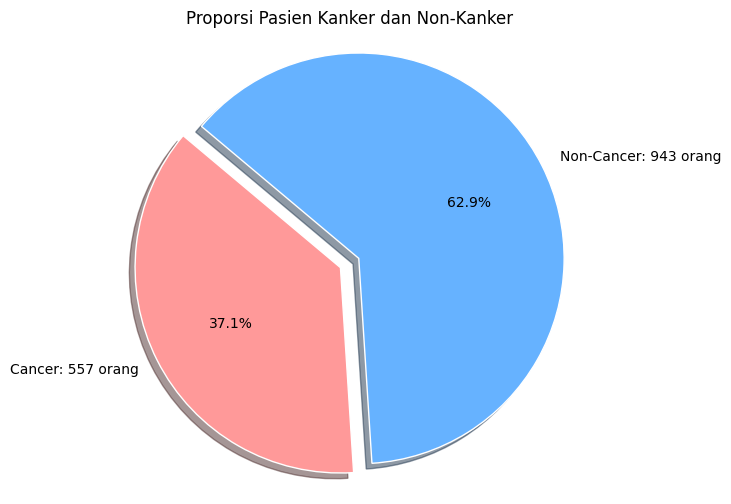

In [163]:
import matplotlib.pyplot as plt

# Visualisasi proporsi pasien kanker dan non-kanker menggunakan pie chart.

# Pisahkan data berdasarkan diagnosis.
cancer = df[df['Diagnosis'] == 1]
non_cancer = df[df['Diagnosis'] == 0]

# Hitung jumlah pasien untuk setiap kategori.
num_cancer = len(cancer)
num_non_cancer = len(non_cancer)

# Definisikan label, ukuran, warna, dan pengaturan pie chart.
labels = [f'Cancer: {num_cancer} orang', f'Non-Cancer: {num_non_cancer} orang']
sizes = [num_cancer, num_non_cancer]
colors = ['#FF9999', '#66B2FF']  # Gunakan warna merah muda (#FF9999) dan biru muda (#66B2FF)
explode = (0.1, 0)  # Pisahkan potongan "Cancer" untuk penekanan.

# Buat pie chart.
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140,
        wedgeprops={'edgecolor': 'white'})
plt.axis('equal')  # Pastikan pie chart berbentuk lingkaran.
plt.title('Proporsi Pasien Kanker dan Non-Kanker')
plt.show()

Pie chart menunjukkan proporsi jumlah pasien kanker (warna pink, 557 orang atau 37.1%) dan non-kanker (warna biru, 943 orang atau 62.9%). Visualisasi ini membantu mengetahui apakah data target memiliki distribusi seimbang atau tidak.

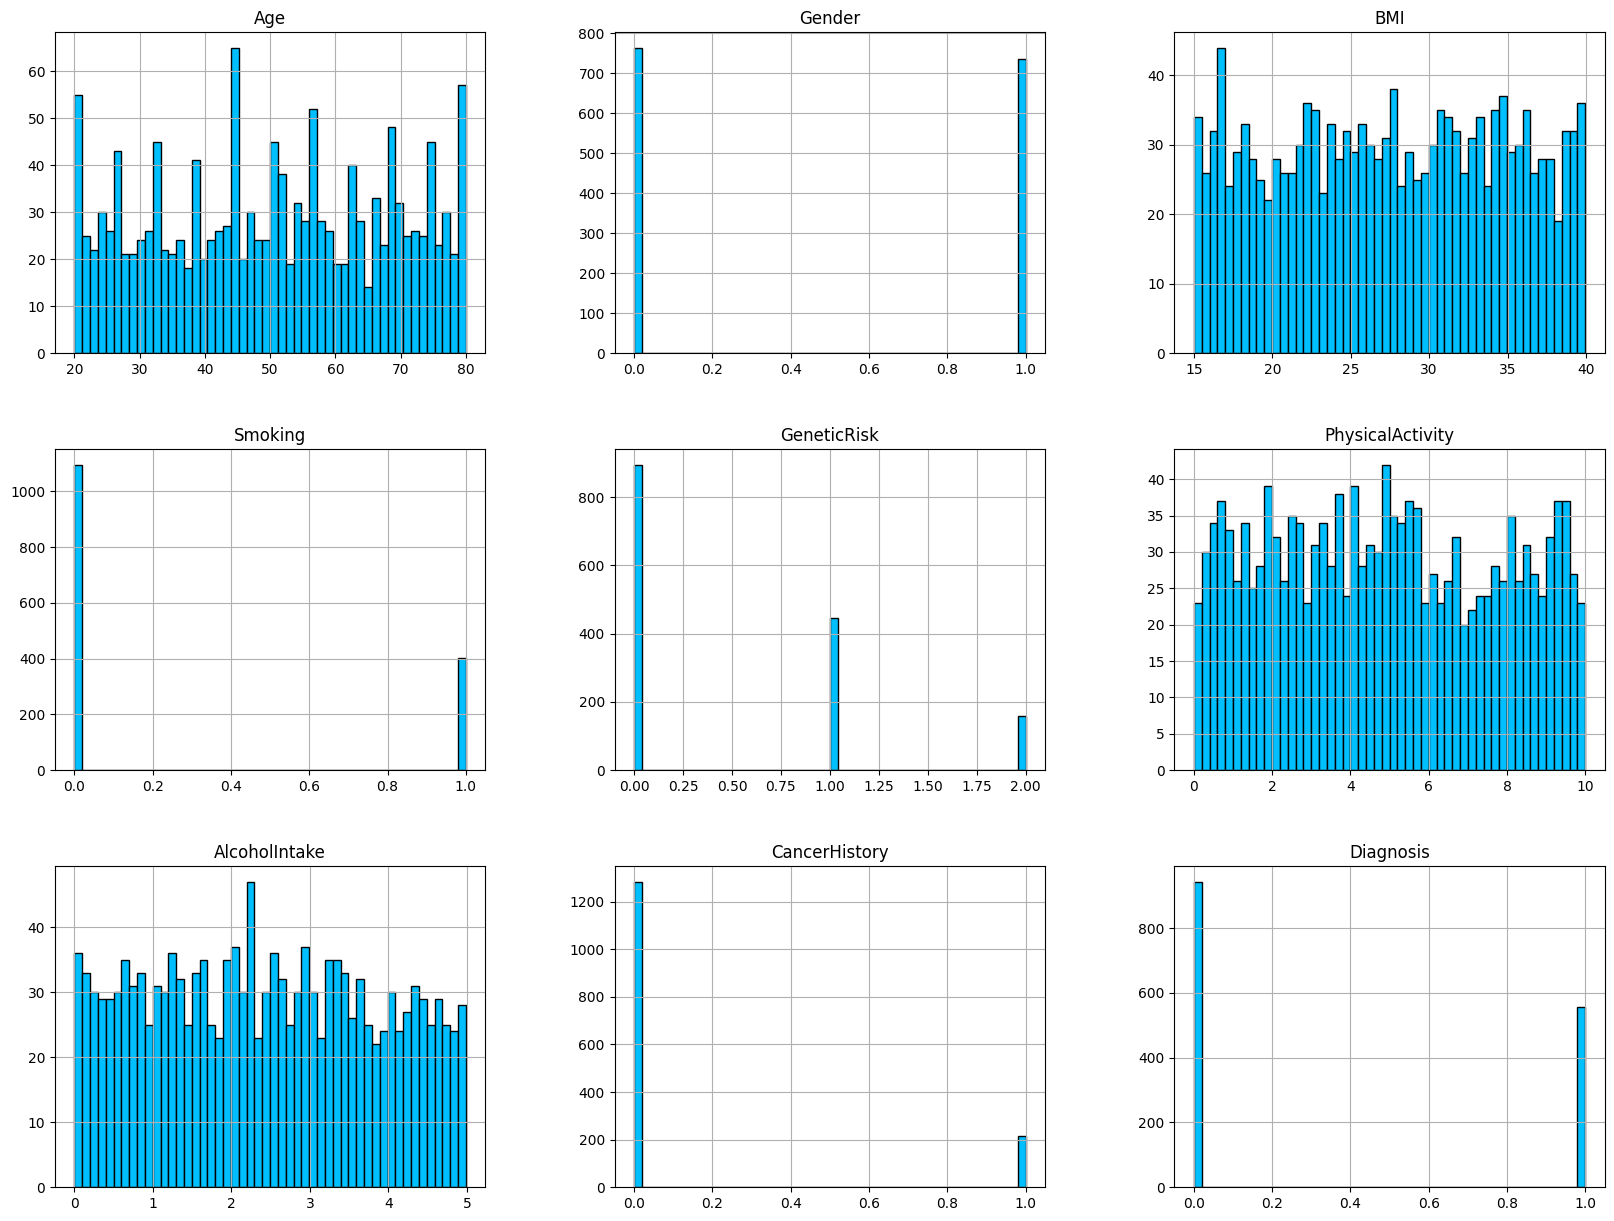

In [164]:
# Memvisualisasikan distribusi data numerik menggunakan histogram.
df.hist(bins=50, figsize=(20, 15), color='#00BFFF', edgecolor='black') # Menggunakan warna biru muda (#00BFFF)
plt.show()

Histogram menampilkan distribusi dari masing-masing fitur numerik dalam dataset. Dari sini kita bisa melihat apakah data berdistribusi normal, apakah ada skewness, serta persebaran nilai tiap fitur.


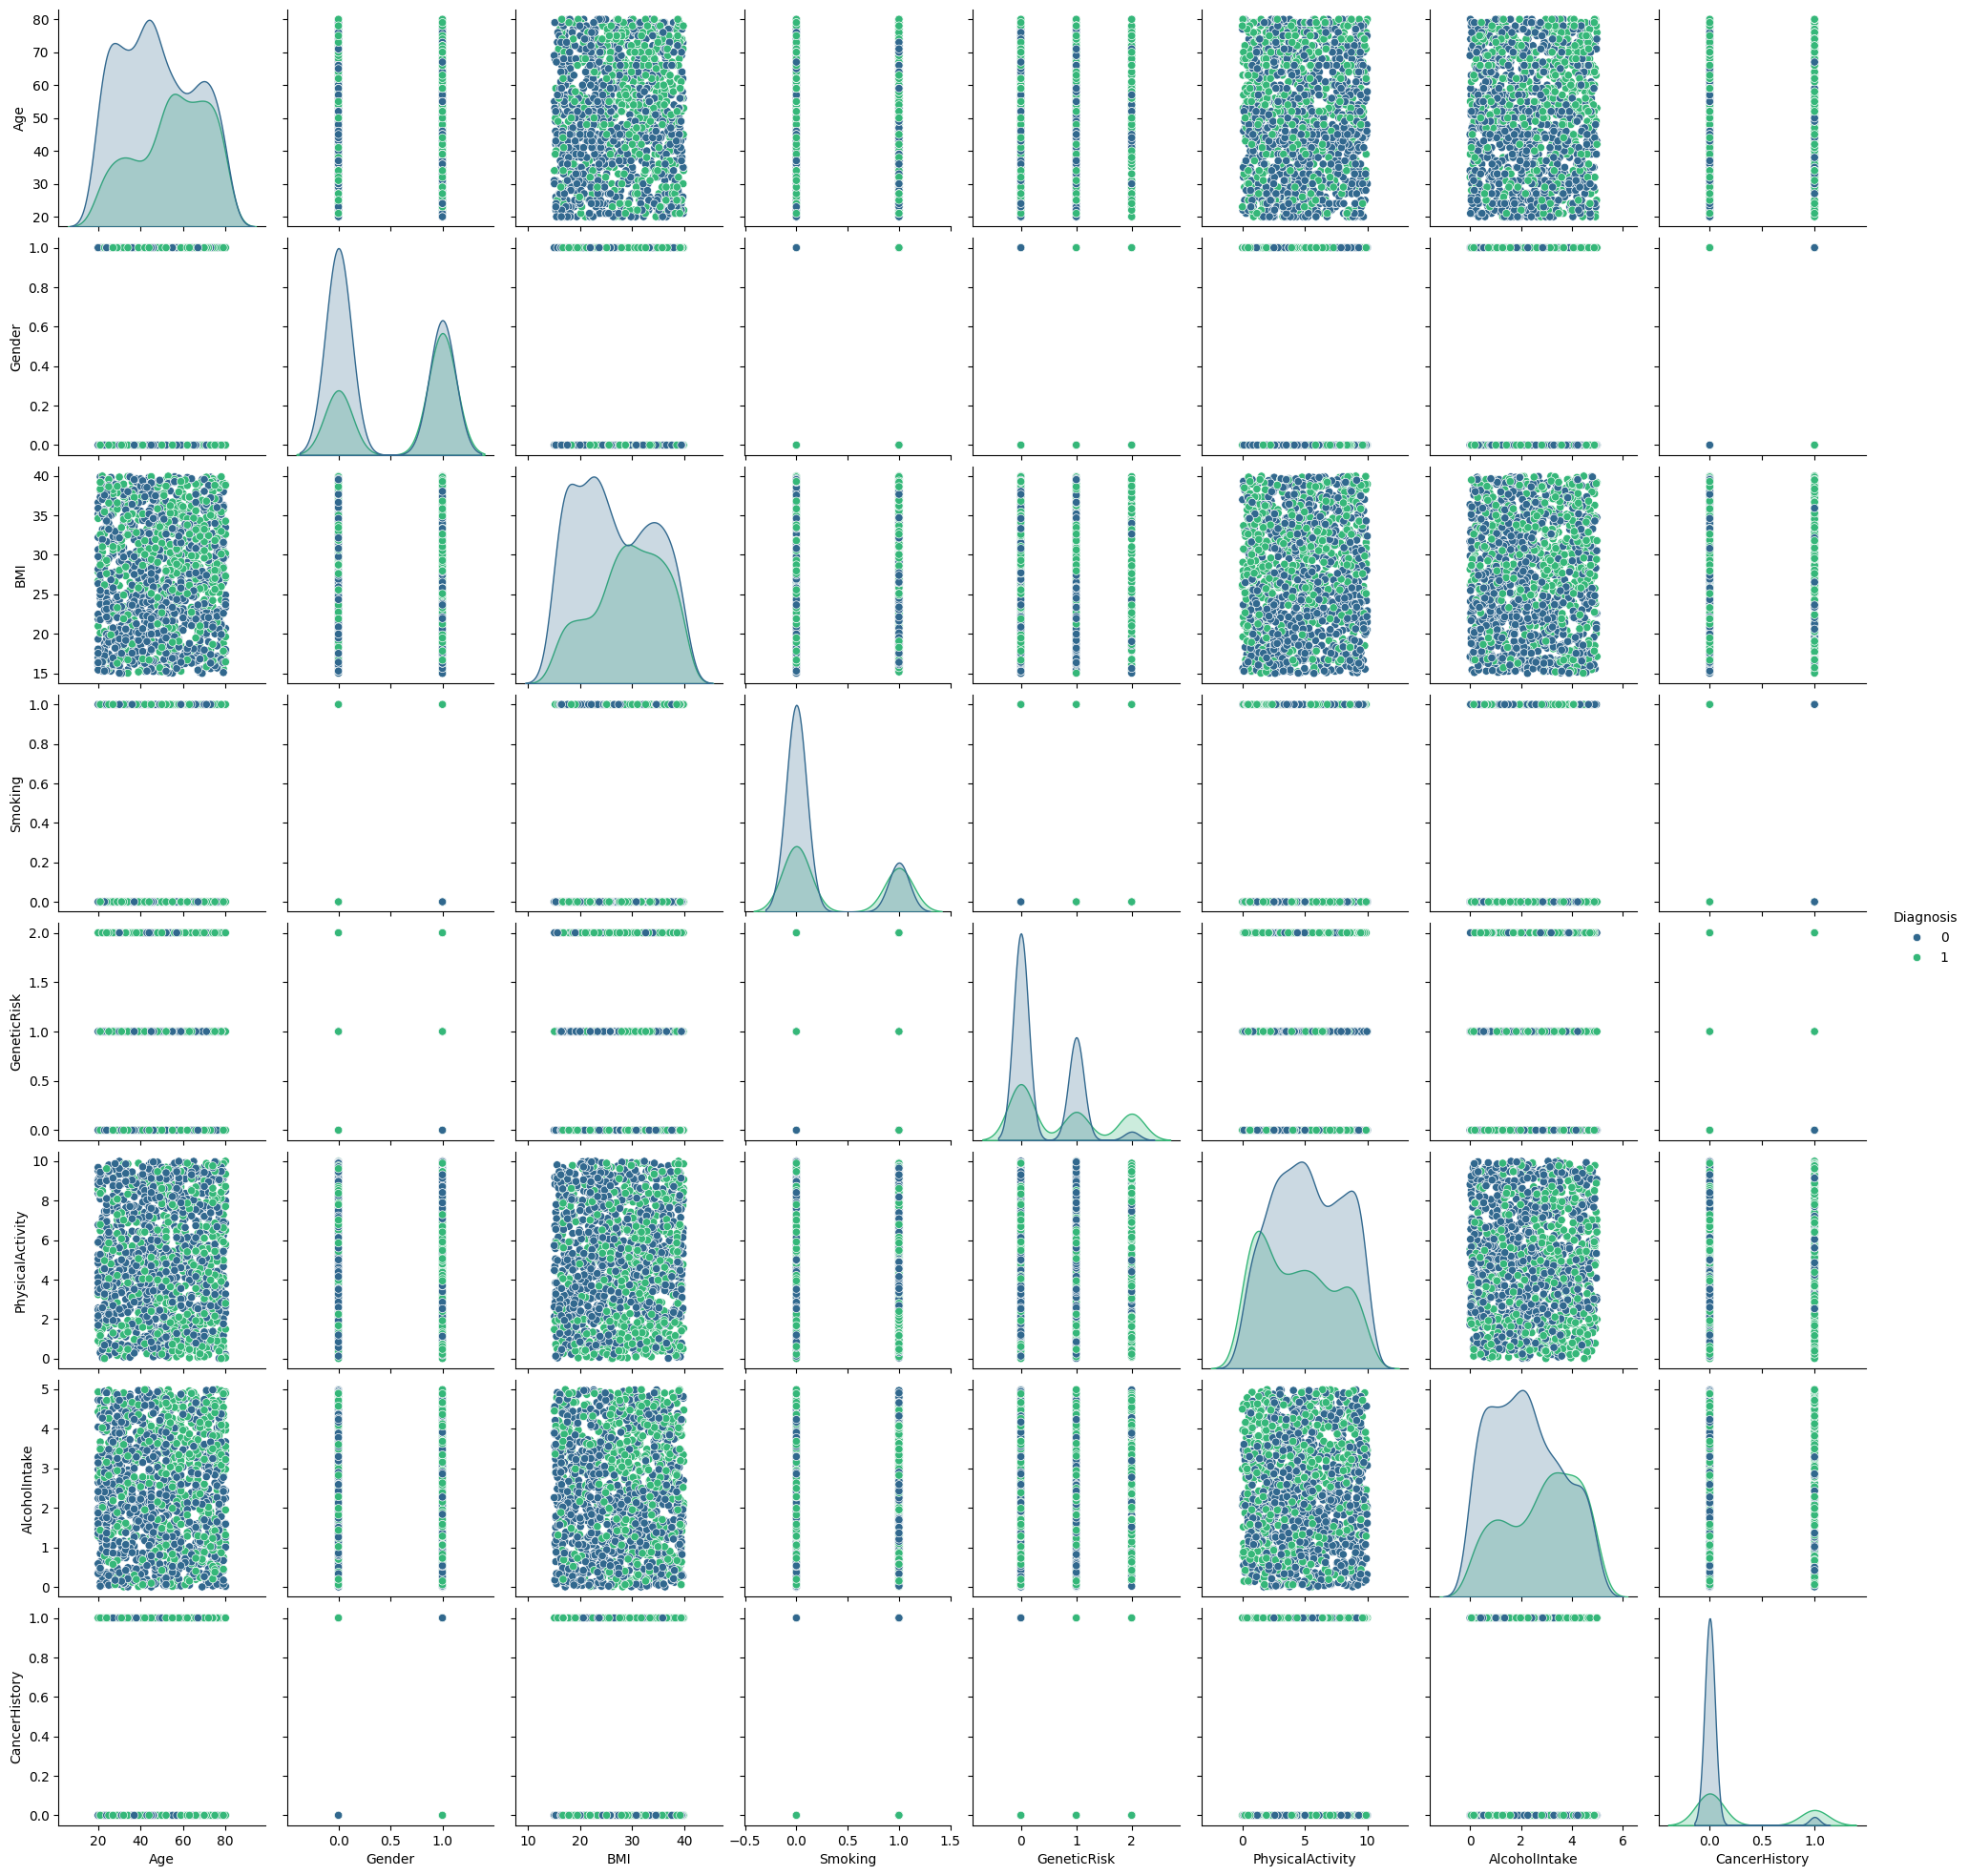

In [165]:
# Membuat pairplot untuk melihat hubungan antar variabel berdasarkan diagnosis.
sns.pairplot(df, hue="Diagnosis", palette="viridis") # Menggunakan palette "viridis"

Pairplot menunjukkan hubungan antara setiap fitur dua variabel dengan pewarnaan berdasarkan kelas diagnosis (kanker atau non-kanker). Ini membantu melihat apakah ada fitur yang memisahkan dua kelas secara visual, serta korelasi antar fitur.


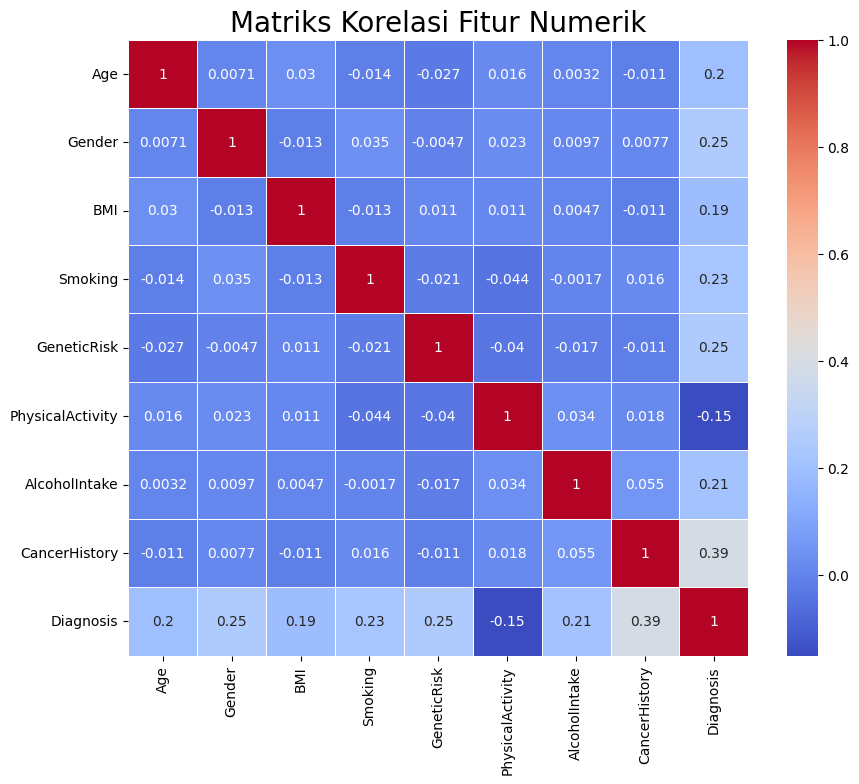

In [166]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr() # Menghitung matriks korelasi

# Visualisasi matriks korelasi menggunakan heatmap.
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriks Korelasi Fitur Numerik", size=20) # Mengubah judul
plt.show()

Heatmap korelasi menunjukkan hubungan linear antara variabel numerik. Nilai mendekati +1 atau -1 menunjukkan korelasi kuat, sedangkan mendekati 0 berarti tidak berkorelasi. Hal ini penting dalam pemilihan fitur dan memahami multikolinearitas.

In [167]:
# Menampilkan jumlah baris dan kolom dalam DataFrame.
num_rows, num_cols = df.shape
print(f"Jumlah baris: {num_rows}, Jumlah kolom: {num_cols}")

Jumlah baris: 1500, Jumlah kolom: 9


Menampilkan bahwa dataset terdiri dari 1500 baris dan 9 kolom. Informasi ini berguna untuk mengetahui ukuran awal data sebelum dilakukan preprocessing lanjutan.

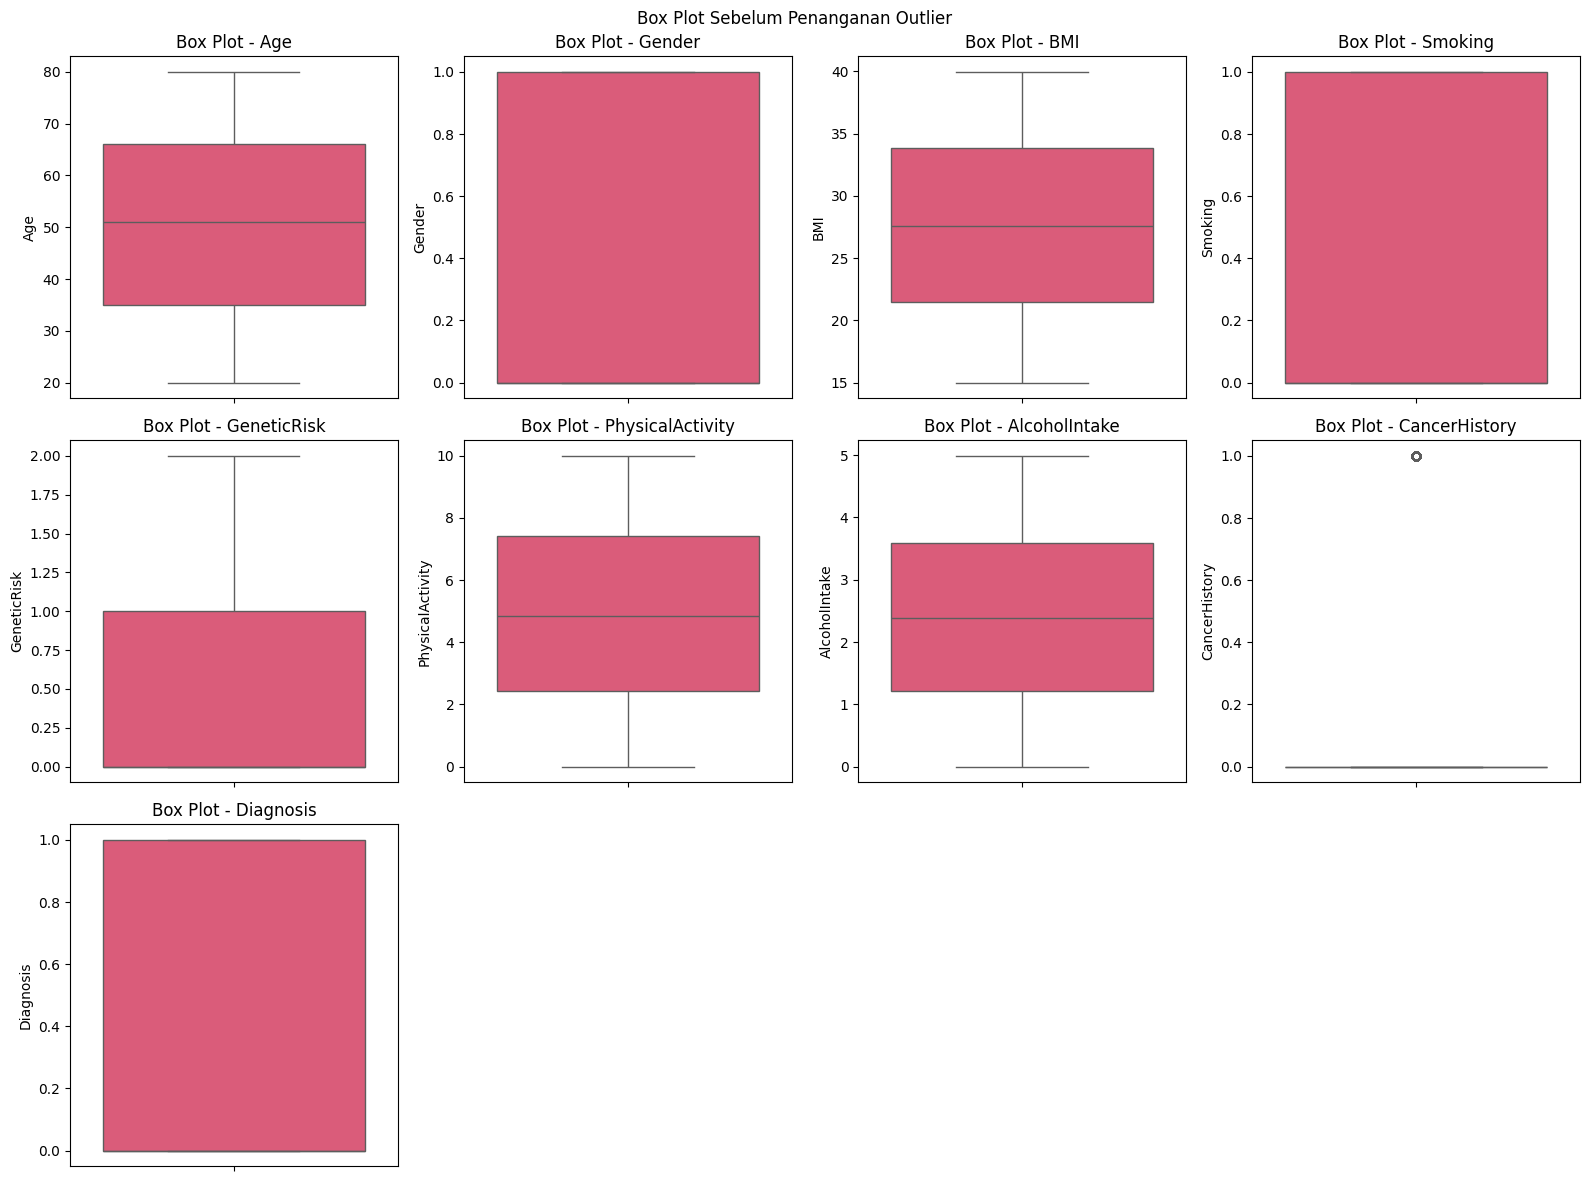

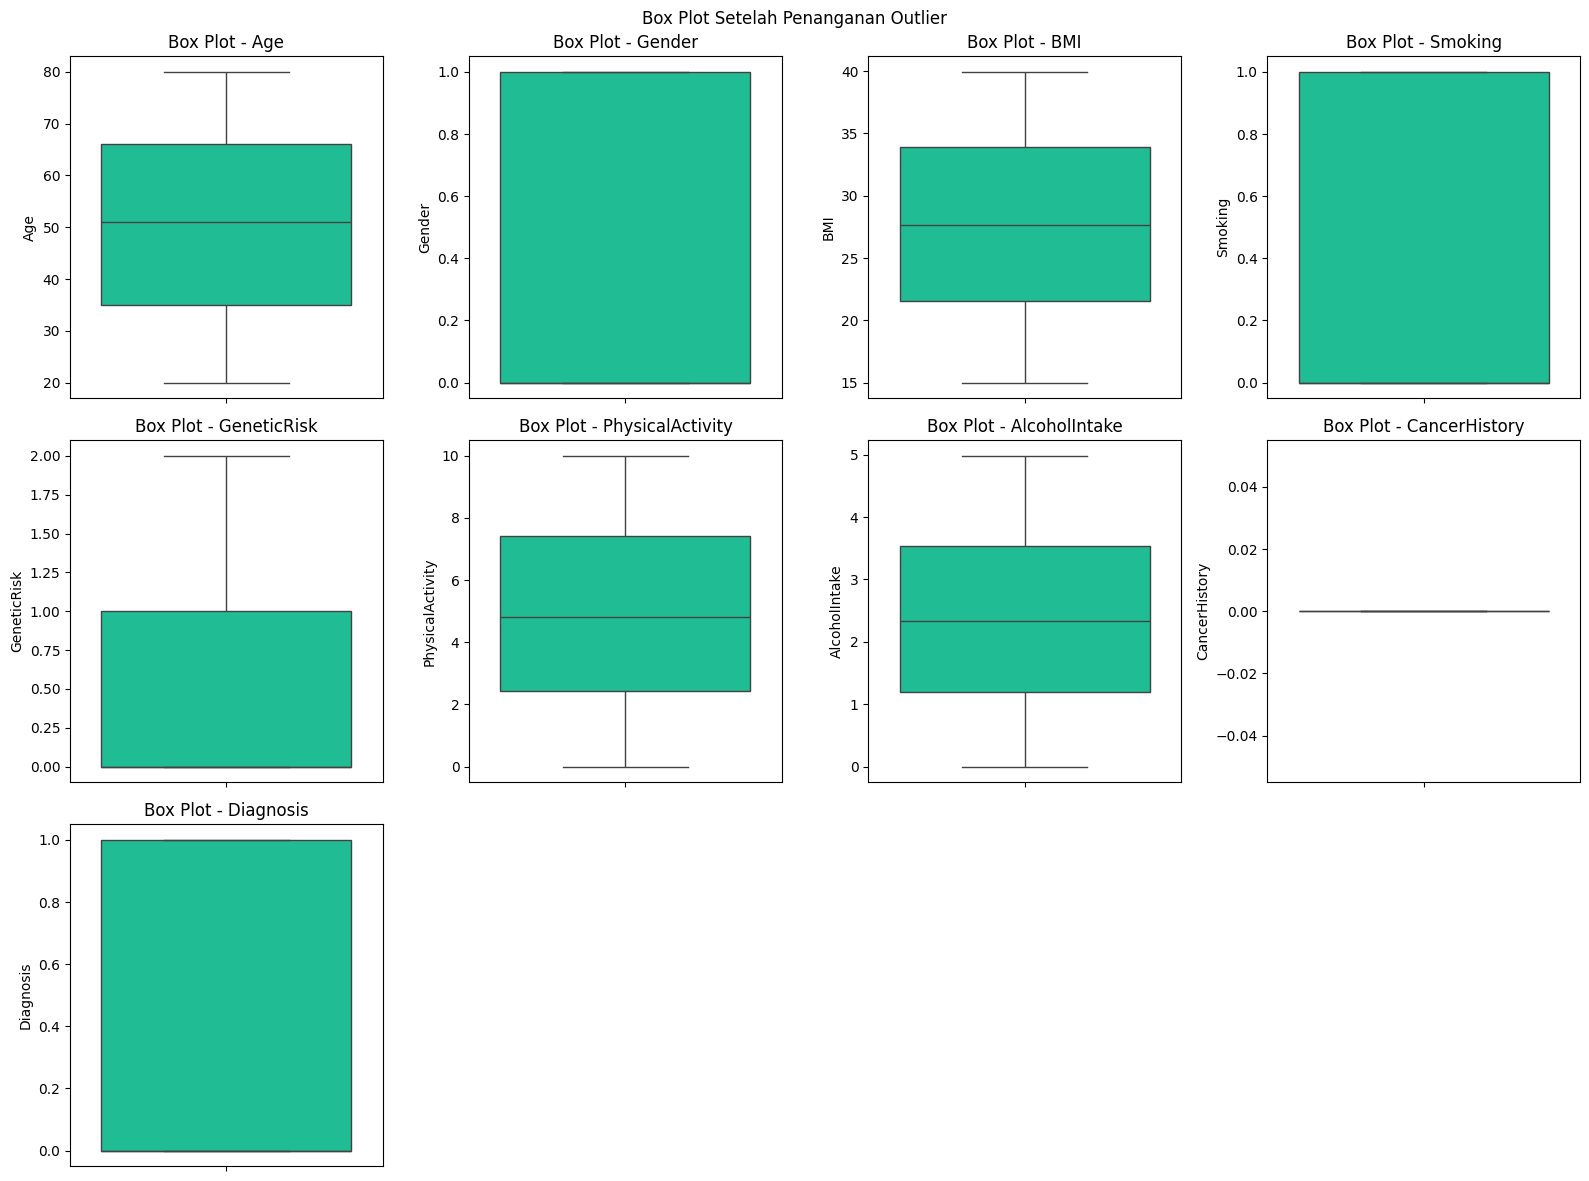

In [168]:
def visualisasi_boxplot(df, title, color):
    num_cols = len(df.columns)
    num_rows = (num_cols + 3) // 4
    fig, axes = plt.subplots(num_rows, 4, figsize=(16, num_rows * 4))
    plt.suptitle(title)

    for i, column in enumerate(df.columns):
        row = i // 4
        col = i % 4
        sns.boxplot(df[column], ax=axes[row, col], color=color)
        axes[row, col].set_title(f"Box Plot - {column}")

    for i in range(num_cols, num_rows * 4):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

# Box plot sebelum penanganan outlier
visualisasi_boxplot(df, "Box Plot Sebelum Penanganan Outlier", '#EF476F')

# ... (Kode untuk penanganan outlier) ...
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

df.shape
# Box plot setelah penanganan outlier
visualisasi_boxplot(df, "Box Plot Setelah Penanganan Outlier", '#06D6A0')

Visualisasi boxplot digunakan untuk mendeteksi outlier pada setiap fitur. Outlier ditangani menggunakan metode IQR. Boxplot setelah pembersihan menunjukkan persebaran yang lebih bersih tanpa nilai ekstrem.

In [169]:
from imblearn.over_sampling import SMOTE

# Memisahkan fitur (X) dan target (y).
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Melakukan oversampling menggunakan SMOTE.
smote = SMOTE(random_state=42)  # Menambahkan random_state untuk reproduksibilitas
X_resampled, y_resampled = smote.fit_resample(X, y)

# Menampilkan distribusi kelas setelah oversampling.
print("Distribusi kelas setelah oversampling:", Counter(y_resampled))

Distribusi kelas setelah oversampling: Counter({0: 907, 1: 907})


Sebelum SMOTE, data tidak seimbang (kelas kanker lebih sedikit). Dengan SMOTE (Synthetic Minority Over-sampling Technique), data kelas minoritas disintesis agar jumlahnya seimbang dengan mayoritas. Hasilnya, jumlah pasien kanker dan non-kanker menjadi sama, yaitu 907 orang.



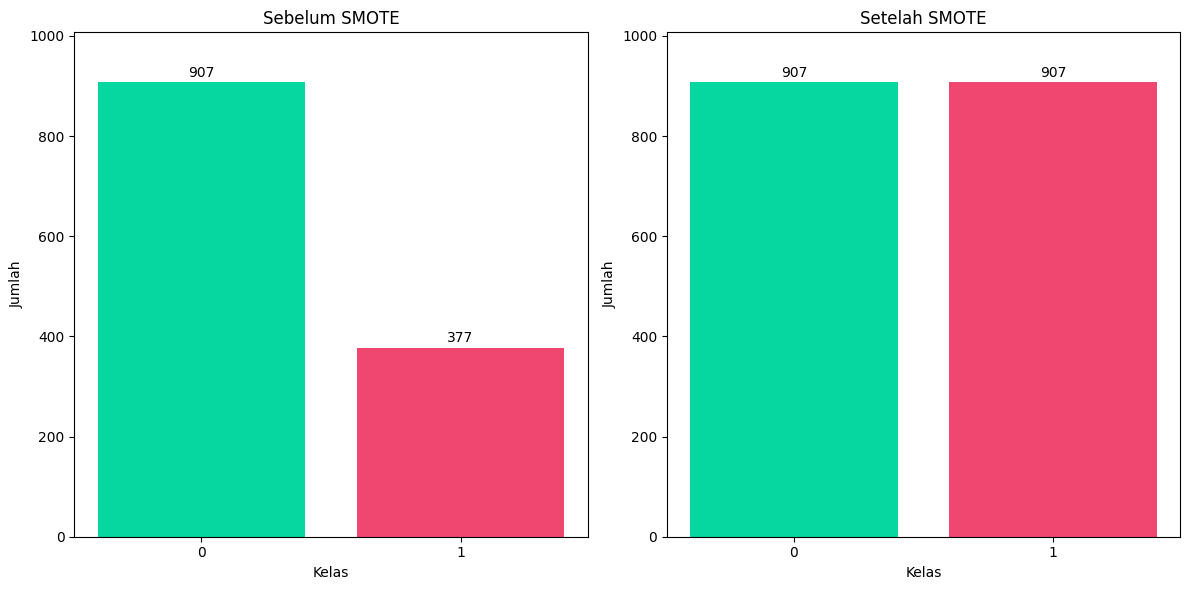

In [170]:
import matplotlib.pyplot as plt
from collections import Counter

# Distribusi kelas sebelum SMOTE
class_distribution_before = Counter(y)

# Distribusi kelas setelah SMOTE
class_distribution_after = Counter(y_resampled)

# Visualisasi perbandingan
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Sebelum SMOTE
axes[0].bar(class_distribution_before.keys(), class_distribution_before.values(), color=['#06D6A0', '#EF476F'])
axes[0].set_xticks([0, 1])
axes[0].set_xlabel('Kelas')
axes[0].set_ylabel('Jumlah')
axes[0].set_title('Sebelum SMOTE')
axes[0].set_ylim([0, max(class_distribution_before.values()) + 100])

for i, v in enumerate(class_distribution_before.values()):
    axes[0].text(i, v + 5, str(v), ha='center', va='bottom')

# Setelah SMOTE
axes[1].bar(class_distribution_after.keys(), class_distribution_after.values(), color=['#06D6A0', '#EF476F'])
axes[1].set_xticks([0, 1])
axes[1].set_xlabel('Kelas')
axes[1].set_ylabel('Jumlah')
axes[1].set_title('Setelah SMOTE')
axes[1].set_ylim([0, max(class_distribution_after.values()) + 100])

for i, v in enumerate(class_distribution_after.values()):
    axes[1].text(i, v + 5, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Visualisasi perbandingan distribusi kelas sebelum dan sesudah SMOTE. Sebelum SMOTE, jumlah kelas 0 (non-kanker) adalah 907 dan kelas 1 (kanker) hanya 377. Setelah SMOTE, kedua kelas menjadi seimbang, yaitu 907 orang per kelas. Hal ini penting untuk menghindari bias pada model prediksi yang cenderung memihak kelas mayoritas.


# 3. Data Preparation

Bagian ini bertujuan untuk mempersiapkan data agar siap digunakan dalam proses pelatihan model machine learning. Data preparation sangat penting karena model machine learning sangat sensitif terhadap struktur dan skala data. Tahapan yang dilakukan meliputi pemisahan data menjadi training dan testing serta proses standardisasi agar model dapat belajar secara efektif dan adil.



---



## 3.1 Data splitting


Pada tahap ini, dataset dibagi menjadi dua bagian, yaitu data latih (training set) dan data uji (testing set). Tujuannya adalah agar:

*   Model dilatih hanya pada data training.
*   Data testing digunakan untuk mengukur kemampuan generalisasi model terhadap data baru yang tidak pernah dilihat sebelumnya.

Pembagian ini penting untuk menghindari overfitting, yaitu kondisi di mana model terlalu menghafal data pelatihan dan gagal mengenali pola baru.

---



In [171]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan target (y) dari DataFrame.
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Membagi data menjadi training set dan testing set.
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=42)

Penjelasan:
*   X = df.drop('Diagnosis', axis=1) → Mengambil semua kolom kecuali kolom 'Diagnosis' sebagai fitur.
*   y = df['Diagnosis'] → Mengambil kolom 'Diagnosis' sebagai target (label).
*   train_test_split(...) → Fungsi untuk membagi data menjadi 70% untuk training dan 30% untuk testing. Parameter random_state=42 digunakan agar hasil pembagian tetap konsisten setiap kali kode dijalankan.
*   X_over dan y_over adalah hasil dari proses SMOTE sebelumnya (data sudah seimbang antara kelas kanker dan non-kanker).

## 3.2 Standardization

Standardisasi bertujuan untuk menyamakan skala fitur numerik dalam dataset. Ini penting karena banyak algoritma machine learning (seperti KNN, SVM, dan regresi logistik) sangat sensitif terhadap skala fitur.
Jika tidak distandarkan, fitur dengan rentang nilai besar dapat mendominasi proses pelatihan dan membuat model bias.

StandardScaler mengubah data menjadi distribusi dengan:
*   Rata-rata = 0
*   Standar deviasi = 1

---



In [172]:
from sklearn.preprocessing import StandardScaler

# Membuat objek StandardScaler.
scaler = StandardScaler()

# Melakukan standarisasi pada data training dan testing.
X_train_prepared = scaler.fit_transform(X_train)
X_test_prepared = scaler.transform(X_test)

Penjelasan:
*   StandardScaler() → Membuat objek scaler untuk melakukan transformasi standar.
*   fit_transform(X_train) → Melatih scaler pada data training (menghitung mean dan std), lalu menerapkan transformasi.
*   transform(X_test) → Menerapkan transformasi yang sama ke data testing, tanpa menghitung ulang mean dan std. Ini penting agar tidak terjadi data leakage dari data testing ke data training.

# 4. Model Development

Bagian ini bertujuan untuk membangun model machine learning menggunakan algoritma yang sesuai dan meningkatkan kinerjanya melalui proses tuning. Model dikembangkan, dievaluasi, dan disempurnakan dengan memilih kombinasi parameter terbaik menggunakan teknik seperti Grid Search.

Langkah-langkah utama dalam bagian ini meliputi:
1.   Membangun model dasar (baseline).
2.   Melatih model dengan data training.
3.   Mengevaluasi model pada data training dan testing.
4.   Melakukan hyperparameter tuning agar performa model meningkat.

---



In [173]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi data tabular
import seaborn as sns  # Mengimpor seaborn untuk visualisasi data
import matplotlib.pyplot as plt  # Mengimpor matplotlib untuk membuat grafik

from sklearn.metrics import accuracy_score  # Mengimpor fungsi untuk menghitung akurasi prediksi
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # (Redundant) Mengimpor ulang fungsi evaluasi model

# Dictionary untuk menyimpan nama model serta akurasi sebelum dan sesudah tuning
model_scores = {
    'Model': [],  # List kosong untuk menyimpan nama model
    'Before Tuning': [],  # List kosong untuk menyimpan akurasi sebelum tuning
    'After Tuning': []  # List kosong untuk menyimpan akurasi setelah tuning
}
### -> Membuat dictionary kosong untuk menyimpan nama model dan skor akurasinya
####  sebelum dan sesudah dilakukan tuning. Ini digunakan sebagai pembanding kinerja model.


Penjelasan:
*   Mengimpor pustaka-pustaka yang digunakan untuk visualisasi dan evaluasi model. accuracy_score, classification_report, dan confusion_matrix akan digunakan untuk mengukur performa model dari berbagai aspek, seperti akurasi, presisi, recall, dan F1-score.



In [174]:
# Fungsi untuk mencetak skor akurasi, classification report, dan confusion matrix
def print_score(clf, X_train, y_train, X_test, y_test, train=False):
    if train:  # Jika argumen 'train=True', evaluasi menggunakan data latih
        pred = clf.predict(X_train)  # Lakukan prediksi pada data latih
        data_type = "Train"  # Tandai tipe data sebagai Train
        y_true = y_train  # Label sebenarnya adalah label data latih
    else:  # Jika 'train=False', evaluasi menggunakan data uji
        pred = clf.predict(X_test)  # Lakukan prediksi pada data uji
        data_type = "Test"  # Tandai tipe data sebagai Test
        y_true = y_test  # Label sebenarnya adalah label data uji

    accuracy = accuracy_score(y_true, pred) * 100  # Hitung akurasi dan ubah ke persen
    print(f"{data_type} Accuracy Score: {accuracy:.2f}%")  # Tampilkan akurasi

    return accuracy  # Kembalikan nilai akurasi

Penjelasan:
*   Fungsi untuk mengevaluasi model dengan mencetak skor akurasi pada data latih atau data uji.
*   Output-nya adalah nilai akurasi dalam persen dan juga pengembalian nilai tersebut untuk disimpan atau dibandingkan.
*   Fleksibel karena bisa digunakan untuk mengevaluasi baik training maupun testing.

## 4.1 Extra Trees Classifier

In [175]:
from sklearn.ensemble import ExtraTreesClassifier  # Mengimpor algoritma Extra Trees Classifier

# Membuat model Extra Trees dengan 50 pohon, kedalaman maksimum 5, dan fitur maksimum 'sqrt'
extra_trees_model = ExtraTreesClassifier(n_estimators=50, max_depth=5, max_features='sqrt')

# Melatih model Extra Trees Classifier dengan data latih
extra_trees_model.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=5, n_estimators=50)

In [176]:
# Mencetak dan menghitung akurasi pada data latih menggunakan model sebelum tuning
print_score(extra_trees_model, X_train, y_train, X_test, y_test, train=True)

Train Accuracy Score: 82.82%


82.82111899133176

In [177]:
# Mencetak dan menghitung akurasi pada data uji (sebelum tuning), lalu menyimpannya
test_accuracy_before_tree = print_score(extra_trees_model, X_train, y_train, X_test, y_test, train=False)

Test Accuracy Score: 80.55%


In [178]:
# Menyimpan model sebelum tuning untuk dibandingkan nanti
extra_trees_model_before = extra_trees_model

In [179]:
from sklearn.model_selection import GridSearchCV # Mengimpor GridSearchCV untuk hyperparameter tuning

# Membuat model dasar Extra Trees untuk dituning
model = ExtraTreesClassifier(random_state=123)

# Menentukan kombinasi parameter yang akan diuji selama tuning
param_grid = {
    'n_estimators': [50, 100, 200, 300], # Jumlah pohon dalam hutan
    'max_features': ['sqrt', 'log2'], # Strategi pemilihan fitur saat split
    'max_depth': [5, 6, 7, 8], # Kedalaman maksimum dari tiap pohon
    'criterion': ['gini', 'entropy']  # Kriteria pemisahan untuk node
}

# Melakukan Grid Search dengan cross-validation 5-fold dan paralel (n_jobs=-1)
extra_trees_model_tuning = GridSearchCV(estimator=extra_trees_model, param_grid=param_grid, cv=5, n_jobs=-1)
# Melatih model tuning pada data latih
extra_trees_model_tuning.fit(X_train, y_train)

# Menampilkan kombinasi parameter terbaik yang ditemukan
print("Best parameters: ", extra_trees_model_tuning.best_params_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 300}


In [180]:
# Mencetak dan menghitung akurasi pada data latih dengan model hasil tuning
print_score(extra_trees_model_tuning, X_train, y_train, X_test, y_test, train=True)

Train Accuracy Score: 89.99%


89.99211977935381

In [181]:
# Mencetak dan menghitung akurasi pada data uji dengan model hasil tuning
test_accuracy_after_tree = print_score(extra_trees_model_tuning, X_train, y_train, X_test, y_test, train=False)

Test Accuracy Score: 80.73%


In [182]:
# Menyimpan hasil akurasi sebelum tuning untuk model Extra Trees
results_before = {'Extra Trees': test_accuracy_before_tree}

# Menyimpan hasil akurasi setelah tuning untuk model Extra Trees
results_after = {'Extra Trees': test_accuracy_after_tree}

## 4.2 Random Forest

In [183]:
from sklearn.ensemble import RandomForestClassifier  # Mengimpor algoritma Random Forest

# Membuat model Random Forest dengan 50 pohon, kedalaman maksimum 5, dan max_features 'sqrt'
random_forest_model = RandomForestClassifier(n_estimators=50, max_depth=5, max_features='sqrt')

# Melatih model Random Forest dengan data latih
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50)

In [184]:
# Mencetak dan menghitung akurasi pada data latih menggunakan model sebelum tuning
print_score(random_forest_model, X_train, y_train, X_test, y_test, train=True)

Train Accuracy Score: 85.19%


85.18518518518519

In [185]:
# Mencetak dan menghitung akurasi pada data uji (sebelum tuning), lalu menyimpannya
test_accuracy_before_rf = print_score(random_forest_model, X_train, y_train, X_test, y_test, train=False)

Test Accuracy Score: 79.63%


In [186]:
# Menyimpan model sebelum tuning untuk dibandingkan nanti
random_forest_model_before = random_forest_model

In [187]:
from sklearn.model_selection import GridSearchCV # Mengimpor GridSearchCV untuk hyperparameter tuning

# Membuat model dasar Random Forest untuk dituning
model = RandomForestClassifier(random_state=123)

# Menentukan kombinasi parameter yang akan diuji selama tuning
param_grid = {
    'n_estimators': [50, 100, 200, 300], # Jumlah pohon dalam hutan
    'max_features': ['sqrt', 'log2'], # Strategi pemilihan fitur saat split
    'max_depth': [5, 6, 7, 8], # Kedalaman maksimum dari tiap pohon
    'criterion': ['gini', 'entropy'] # Kriteria pemisahan untuk node
}

# Membuat objek GridSearchCV dengan cross-validation 5-fold dan menggunakan seluruh core CPU (n_jobs=-1)
random_forest_model_tuning = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

# Melatih model tuning pada data latih
random_forest_model_tuning.fit(X_train, y_train)

# Menampilkan kombinasi parameter terbaik yang ditemukan
print("Best parameters: ", random_forest_model_tuning.best_params_)


Best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 300}


In [188]:
# Mencetak dan menghitung akurasi pada data latih dengan model hasil tuning
print_score(random_forest_model_tuning, X_train, y_train, X_test, y_test, train=True)

Train Accuracy Score: 93.62%


93.61702127659575

In [189]:
# Mencetak dan menghitung akurasi pada data uji dengan model hasil tuning
test_accuracy_after_rf = print_score(random_forest_model_tuning, X_train, y_train, X_test, y_test, train=False)  # Capture accuracy

Test Accuracy Score: 81.28%


In [190]:
# Menyimpan hasil akurasi sebelum tuning untuk model Random Forest
results_before['Random Forest'] = test_accuracy_before_rf

# Menyimpan hasil akurasi setelah tuning untuk model Random Forest
results_after['Random Forest'] = test_accuracy_after_rf

## 4.3 KNN (K-Nearest Neighbor)

In [191]:
from sklearn.neighbors import KNeighborsClassifier  # Mengimpor algoritma KNN (K-Nearest Neighbor)

# Membuat model KNN dengan jumlah tetangga terdekat = 5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Melatih model dengan data latih
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [192]:
# Mencetak dan menghitung akurasi pada data latih menggunakan model sebelum tuning
print_score(knn_model, X_train, y_train, X_test, y_test, train=True)

Train Accuracy Score: 84.40%


84.39716312056737

In [193]:
# Mencetak dan menghitung akurasi pada data uji (sebelum tuning), lalu menyimpannya
test_accuracy_before_knn = print_score(knn_model, X_train, y_train, X_test, y_test, train=False)

Test Accuracy Score: 70.83%


In [194]:
# Menyimpan model sebelum tuning untuk dibandingkan nanti
knn_model_before = knn_model

In [195]:
from sklearn.model_selection import GridSearchCV # Mengimpor GridSearchCV untuk hyperparameter tuning

# Menentukan kombinasi parameter yang akan diuji selama tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Mencoba beberapa nilai jumlah tetangga terdekat
    'weights': ['uniform', 'distance'],  # Mencoba metode pembobotan
    'metric': ['euclidean', 'manhattan']  # Mencoba metrik jarak: Euclidean atau Manhattan
}

# Melakukan Grid Search dengan cross-validation 5-fold dan paralel (n_jobs=-1)
knn_model_tuning = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Melatih model tuning pada data latih
knn_model_tuning.fit(X_train, y_train)

# Menampilkan kombinasi parameter terbaik yang ditemukan
print("Best parameters: ", knn_model_tuning.best_params_)

Best parameters:  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [196]:
# Mencetak dan menghitung akurasi pada data latih dengan model hasil tuning
print_score(knn_model_tuning, X_train, y_train, X_test, y_test, train=True)

Train Accuracy Score: 100.00%


100.0

In [197]:
# Mencetak dan menghitung akurasi pada data uji dengan model hasil tuning
test_accuracy_after_knn = print_score(knn_model_tuning, X_train, y_train, X_test, y_test, train=False)  # Capture accuracy

Test Accuracy Score: 78.17%


In [198]:
# Menyimpan hasil akurasi sebelum tuning untuk model KNN (K-Nearest Neighbor)
results_before['KNN'] = test_accuracy_before_knn

# Menyimpan hasil akurasi setelah tuning untuk model KNN (K-Nearest Neighbor)
results_after['KNN'] = test_accuracy_after_knn

## 4.4 Support Vector Classifier

In [199]:
from sklearn.svm import SVC # Mengimpor algoritma Support Vector Classifier

# Membuat model Support Vector Classifier
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)

# Melatih model dengan data latih
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [200]:
# Mencetak dan menghitung akurasi pada data latih menggunakan model sebelum tuning
print_score(svm_model, X_train, y_train, X_test, y_test, train=True)

Train Accuracy Score: 67.22%


67.21828211189913

In [201]:
# Mencetak dan menghitung akurasi pada data uji (sebelum tuning), lalu menyimpannya
test_accuracy_before_svm = print_score(svm_model, X_train, y_train, X_test, y_test, train=False)

Test Accuracy Score: 68.26%


In [202]:
# Menyimpan model sebelum tuning untuk dibandingkan nanti
svm_model_before = svm_model

In [203]:
from sklearn.model_selection import GridSearchCV # Mengimpor GridSearchCV untuk hyperparameter tuning

# Menentukan kombinasi parameter yang akan diuji selama tuning
param_grid = {
    'C': [0.1, 1, 10],  # Mencoba nilai berbeda untuk C
    'kernel': ['linear', 'rbf'],  # Mencoba kernel berbeda
    'gamma': ['scale', 'auto']  # Mencoba nilai gamma berbeda
}

# Melakukan Grid Search dengan cross-validation 5-fold dan paralel (n_jobs=-1)
svm_model_tuning = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Melatih model tuning pada data latih
svm_model_tuning.fit(X_train, y_train)

# Menampilkan kombinasi parameter terbaik yang ditemukan
print("Best parameters: ", svm_model_tuning.best_params_)

Best parameters:  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [204]:
# Mencetak dan menghitung akurasi pada data latih dengan model hasil tuning
print_score(svm_model_tuning, X_train, y_train, X_test, y_test, train=True)

Train Accuracy Score: 99.92%


99.92119779353821

In [205]:
# Mencetak dan menghitung akurasi pada data uji dengan model hasil tuning
test_accuracy_after_svm = print_score(svm_model_tuning, X_train, y_train, X_test, y_test, train=False)  # Capture accuracy

Test Accuracy Score: 81.65%


In [206]:
# Menyimpan hasil akurasi sebelum tuning untuk model Support Vector Classifier
results_before['SVC'] = test_accuracy_before_svm

# Menyimpan hasil akurasi setelah tuning untuk model Support Vector Classifier
results_after['SVC'] = test_accuracy_after_svm


## 4.5 Naive Bayes

In [207]:
from sklearn.naive_bayes import GaussianNB # Mengimpor algoritma Naive Bayes

# Membuat model Naive Bayes
naive_bayes_model = GaussianNB()

# Melatih model dengan data latih
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [208]:
# Mencetak dan menghitung akurasi pada data latih menggunakan model sebelum tuning
print_score(naive_bayes_model, X_train, y_train, X_test, y_test, train=True)

Train Accuracy Score: 77.15%


77.14736012608353

In [209]:
# Mencetak dan menghitung akurasi pada data uji (sebelum tuning), lalu menyimpannya
test_accuracy_before_nb = print_score(naive_bayes_model, X_train, y_train, X_test, y_test, train=False)

Test Accuracy Score: 75.78%


In [210]:
# Menyimpan model sebelum tuning untuk dibandingkan nanti
naive_bayes_model_before = naive_bayes_model

In [211]:
from sklearn.model_selection import GridSearchCV # Mengimpor GridSearchCV untuk hyperparameter tuning

# Menentukan kombinasi parameter yang akan diuji selama tuning
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Mencoba nilai berbeda untuk var_smoothing
}

# Melakukan Grid Search
nb_model_tuning = GridSearchCV(estimator=naive_bayes_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Melatih model tuning pada data latih
nb_model_tuning.fit(X_train, y_train)

# Menampilkan kombinasi parameter terbaik yang ditemukan
print("Best parameters: ", nb_model_tuning.best_params_)

Best parameters:  {'var_smoothing': 1e-05}


In [212]:
# Mencetak dan menghitung akurasi pada data latih dengan model hasil tuning
print_score(nb_model_tuning, X_train, y_train, X_test, y_test, train=True)

Train Accuracy Score: 77.23%


77.22616233254531

In [213]:
# Mencetak dan menghitung akurasi pada data uji dengan model hasil tuning
test_accuracy_after_nb = print_score(nb_model_tuning, X_train, y_train, X_test, y_test, train=False)  # Capture accuracy

Test Accuracy Score: 75.60%


In [214]:
# Menyimpan hasil akurasi sebelum tuning untuk model Naive Bayes
results_before['Naive Bayes'] = test_accuracy_before_nb

# Menyimpan hasil akurasi setelah tuning untuk model Naive Bayes
results_after['Naive Bayes'] = test_accuracy_after_nb

# 5. Evaluate Model

Bagian ini bertujuan untuk membandingkan performa lima model klasifikasi berdasarkan akurasi sebelum dan sesudah proses *hyperparameter tuning*. Evaluasi dilakukan melalui tampilan tabel (DataFrame) dan visualisasi grafik batang.

---





## 5.1 DataFrame Model

Pada tahap ini, dibuat sebuah DataFrame untuk merangkum dan membandingkan akurasi masing-masing model sebelum dan sesudah tuning. Nilai akurasi diambil dari dictionary results_before dan results_after.


---



In [215]:
import numpy as np

# Membuat DataFrame dari hasil akurasi sebelum dan sesudah tuning
df_results = pd.DataFrame({
    'Model': list(results_before.keys()), # Kolom nama model
    'Accuracy Before Tuning': list(results_before.values()), # Kolom akurasi sebelum tuning
    'Accuracy After Tuning': [results_after[m] for m in results_before.keys()] # Kolom akurasi setelah tuning, sesuai urutan model
})

df_results # Menampilkan DataFrame hasil perbandingan akurasi

,Model,Accuracy Before Tuning,Accuracy After Tuning
0,Extra Trees,80.550459,80.733945
1,Random Forest,79.633028,81.284404
2,KNN,70.825688,78.165138
3,SVC,68.256881,81.651376
4,Naive Bayes,75.779817,75.596330


Tabel ini membantu mengidentifikasi model mana yang paling optimal berdasarkan peningkatan performa.


## 5.2 Plot Model

Selanjutnya, dibuat visualisasi berupa grafik batang (bar chart) untuk memperjelas perbandingan akurasi sebelum dan sesudah tuning antar model. Setiap model diwakili dua batang: satu untuk before tuning dan satu lagi untuk after tuning. Akurasi dikonversi ke skala desimal (0–1) agar lebih konsisten untuk visualisasi.



---



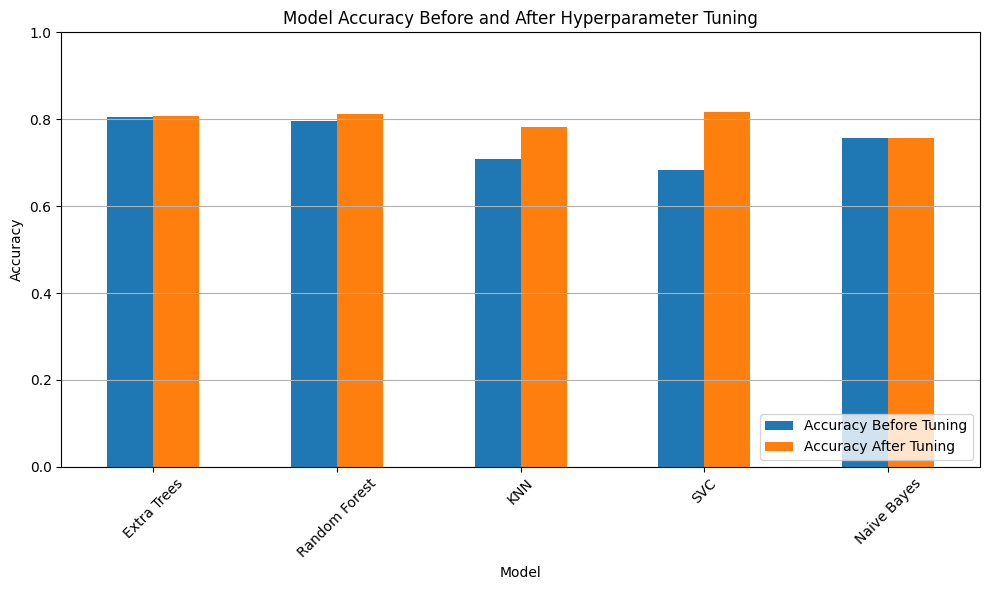

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# --- Ubah skala nilai akurasi menjadi 0-1 ---
df_results['Accuracy Before Tuning'] = df_results['Accuracy Before Tuning'] / 100 # Mengubah akurasi sebelum tuning dari persen ke desimal
df_results['Accuracy After Tuning'] = df_results['Accuracy After Tuning'] / 100 # Mengubah akurasi setelah tuning dari persen ke desimal

# --- Plotting ---
df_results.set_index("Model").plot(kind='bar', figsize=(10, 6)) # Membuat plot batang dengan model sebagai indeks dan ukuran gambar 10x6
plt.title("Model Accuracy Before and After Hyperparameter Tuning") # Judul grafik
plt.ylabel("Accuracy") # Label sumbu y
plt.ylim(0, 1)  # Menetapkan batas sumbu y dari 0 sampai 1
plt.xticks(rotation=45)  # Memutar label sumbu x sebesar 45 derajat agar lebih mudah dibaca
plt.grid(axis='y')  # Menambahkan garis grid hanya pada sumbu y
plt.legend(loc='lower right')  # Menempatkan legenda di kanan bawah
plt.tight_layout()  # Menyesuaikan tata letak agar elemen tidak saling tumpang tindih
plt.show() # Menampilkan grafik

Kesimpulan:

Berdasarkan hasil akurasi, model terbaik adalah SVC (Support Vector Classifier) setelah dilakukan hyperparameter tuning dengan akurasi 81.65%. Berikut beberapa poin penting yang dapat disimpulkan:

1.   SVC menunjukkan peningkatan akurasi terbesar setelah tuning, dari 68.26% menjadi 81.65%. Ini menandakan tuning sangat efektif untuk model ini.

2.   Random Forest memiliki akurasi akhir tertinggi kedua sebesar 81.28%, dan sudah memiliki performa bagus sejak awal (79.63%).

3.   Extra Trees hanya mengalami peningkatan kecil setelah tuning, dari 80.55% menjadi 80.73%, namun tetap stabil dan cukup kompetitif.

4.   KNN mengalami peningkatan signifikan dari 70.83% menjadi 78.17%, meskipun akurasi akhirnya masih di bawah model lain.

5.   Naive Bayes justru mengalami sedikit penurunan akurasi setelah tuning (dari 75.78% menjadi 75.60%), menandakan bahwa parameter default-nya mungkin sudah optimal atau tuning tidak efektif pada model ini.

